In [36]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [37]:
filepath_1 = '/Users/eliasrapkin-siles/Downloads/Machine Learning 1/Project/22Q2 Files/CRISPR_gene_effect.csv'
CRISPR_gene_effect = pd.read_csv(filepath_1)

filepath_2 = '/Users/eliasrapkin-siles/Downloads/Machine Learning 1/Project/22Q2 Files/CRISPR_gene_dependency.csv'
CRISPR_gene_dependency = pd.read_csv(filepath_2)

filepath_3 = '/Users/eliasrapkin-siles/Downloads/Machine Learning 1/Project/22Q2 Files/CCLE_expression.csv'
CCLE_expression = pd.read_csv(filepath_3)

filepath_4 = '/Users/eliasrapkin-siles/Downloads/Machine Learning 1/Project/22Q2 Files/sample_info.csv'
sample_info = pd.read_csv(filepath_4)

In [38]:
sample_info = sample_info[['DepMap_ID', 'sex', 'sample_collection_site', 'primary_disease', 'Subtype', 'age', 'lineage', 'lineage_subtype',
                           'lineage_sub_subtype','Cellosaurus_NCIt_disease']]

# Define values to exclude
values_to_exclude = ['Adrenal Cancer', 'Teratoma', 'Embryonal Cancer', 'Unknown']

In [39]:
CRISPR_gene_effect_master_df = pd.merge(sample_info, CRISPR_gene_effect, on="DepMap_ID", how="outer")
CRISPR_gene_dependency_master_df = pd.merge(sample_info, CRISPR_gene_dependency, on="DepMap_ID", how="outer")
CCLE_expression_master_df = pd.merge(sample_info, CCLE_expression, on="DepMap_ID", how="outer")

Random Forest Accuracy: 0.45
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.60      0.43      0.50         7
           1       1.00      0.90      0.95        10
           2       0.26      0.92      0.41        13
           3       1.00      0.20      0.33         5
           4       1.00      0.08      0.14        13
           5       0.53      0.60      0.56        15
           6       0.50      1.00      0.67         1
           7       0.00      0.00      0.00         2
           8       0.00      0.00      0.00         3
           9       0.00      0.00      0.00         1
          10       0.00      0.00      0.00         3
          11       0.50      0.25      0.33         4
          12       0.00      0.00      0.00         3
          14       0.00      0.00      0.00         1
          17       0.00      0.00      0.00         1
          19       0.00      0.00      0.00         1

    accuracy  

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  

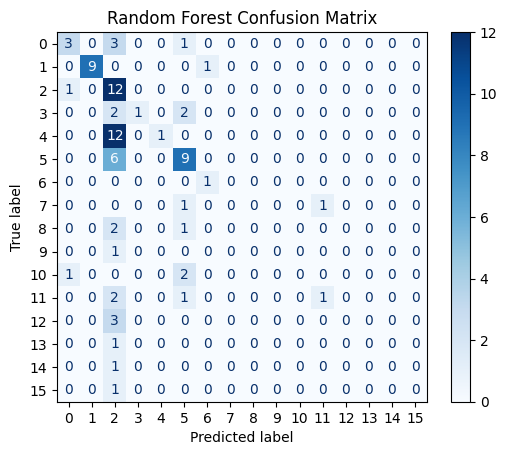

In [40]:
CRISPR_gene_effect_master_df = CRISPR_gene_effect_master_df.dropna()
CRISPR_gene_effect_master_df = CRISPR_gene_effect_master_df[~CRISPR_gene_effect_master_df['primary_disease'].isin(values_to_exclude)]

# Select features (numerical only) and target
X = CRISPR_gene_effect_master_df.drop(['DepMap_ID', 'primary_disease'], axis=1).select_dtypes(include=np.number)
y = CRISPR_gene_effect_master_df['primary_disease']

# Encode the target variable
y = pd.factorize(y)[0]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize the Random Forest Classifier
rf = RandomForestClassifier(n_estimators=200, random_state=42)

# Train the Random Forest on the training set
rf.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = rf.predict(X_test)

# Evaluate the model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {accuracy_rf:.2f}")
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))

# Display the confusion matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf)
disp_rf.plot(cmap='Blues')
plt.title("Random Forest Confusion Matrix")
plt.show()

In [41]:
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_rf, cv=5, scoring='accuracy')
grid_search_rf.fit(X_train, y_train)

# Display best parameters and score
print(f"Best Parameters: {grid_search_rf.best_params_}")
print(f"Best Cross-Validation Accuracy: {grid_search_rf.best_score_:.2f}")

# Use the best model for predictions
best_rf = grid_search_rf.best_estimator_
y_pred_best_rf = best_rf.predict(X_test)

# Evaluate the optimized model
accuracy_best_rf = accuracy_score(y_test, y_pred_best_rf)
print(f"Optimized Random Forest Accuracy: {accuracy_best_rf:.2f}")
print("Optimized Random Forest Classification Report:")
print(classification_report(y_test, y_pred_best_rf))

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Best Parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 100}
Best Cross-Validation Accuracy: 0.47
Optimized Random Forest Accuracy: 0.41
Optimized Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.33      0.14      0.20         7
           1       0.91      1.00      0.95        10
           2       0.26      0.92      0.40        13
           3       1.00      0.40      0.57         5
           4       0.00      0.00      0.00        13
           5       0.44      0.47      0.45        15
           6       0.50      1.00      0.67         1
           7       0.00      0.00      0.00         2
           8       0.00      0.00      0.00         3
           9       0.00      0.00      0.00         1
          10       0.00      0.00      0.00         3
          11       0.50      0.25      0.33         4
          12       0.00      0.00      0.00         3
          14    

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  

Random Forest Accuracy: 0.42
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.14      0.22         7
           1       1.00      1.00      1.00        10
           2       0.25      0.92      0.39        13
           3       0.67      0.40      0.50         5
           4       0.00      0.00      0.00        13
           5       0.62      0.53      0.57        15
           6       0.50      1.00      0.67         1
           7       0.00      0.00      0.00         2
           8       0.00      0.00      0.00         3
           9       0.00      0.00      0.00         1
          10       0.00      0.00      0.00         3
          11       0.25      0.25      0.25         4
          12       0.00      0.00      0.00         3
          14       0.00      0.00      0.00         1
          17       0.00      0.00      0.00         1
          19       0.00      0.00      0.00         1

    accuracy  

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  

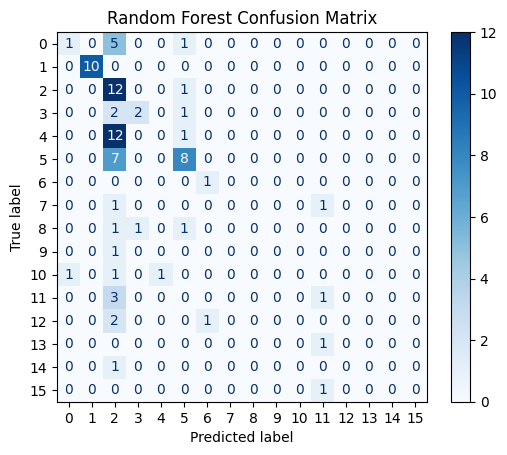

In [49]:
CRISPR_gene_effect_master_df = CRISPR_gene_effect_master_df.dropna()
CRISPR_gene_effect_master_df = CRISPR_gene_effect_master_df[~CRISPR_gene_effect_master_df['primary_disease'].isin(values_to_exclude)]

# Select features (numerical only) and target
X = CRISPR_gene_effect_master_df.drop(['DepMap_ID', 'primary_disease'], axis=1).select_dtypes(include=np.number)
y = CRISPR_gene_effect_master_df['primary_disease']

# Encode the target variable
y = pd.factorize(y)[0]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize the Random Forest Classifier
rf_model = RandomForestClassifier(max_depth= 10, min_samples_leaf= 1, min_samples_split= 10, n_estimators= 100)

# Train the Random Forest on the training set
rf.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = rf.predict(X_test)

# Evaluate the model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {accuracy_rf:.2f}")
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))

# Display the confusion matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf)
disp_rf.plot(cmap='Blues')
plt.title("Random Forest Confusion Matrix")
plt.show()

Random Forest Accuracy: 0.39
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.29      0.36         7
           1       0.82      0.90      0.86        10
           2       0.24      0.85      0.37        13
           3       0.00      0.00      0.00         5
           4       0.50      0.08      0.13        13
           5       0.44      0.53      0.48        15
           6       0.00      0.00      0.00         1
           7       0.00      0.00      0.00         2
           8       0.00      0.00      0.00         3
           9       0.00      0.00      0.00         1
          10       0.00      0.00      0.00         3
          11       1.00      0.25      0.40         4
          12       0.00      0.00      0.00         3
          14       0.00      0.00      0.00         1
          17       0.00      0.00      0.00         1
          19       0.00      0.00      0.00         1

    accuracy  

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  

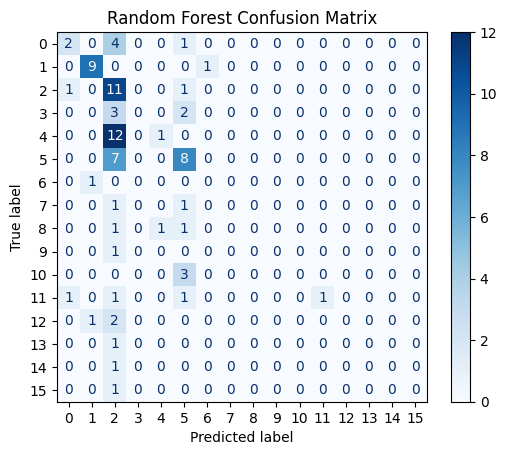

In [43]:
CRISPR_gene_dependency_master_df = CRISPR_gene_effect_master_df.dropna()
CRISPR_gene_dependency_master_df = CRISPR_gene_dependency_master_df[~CRISPR_gene_dependency_master_df['primary_disease'].isin(values_to_exclude)]

# Select features (numerical only) and target
X = CRISPR_gene_dependency_master_df.drop(['DepMap_ID', 'primary_disease'], axis=1).select_dtypes(include=np.number)
y = CRISPR_gene_dependency_master_df['primary_disease']

# Encode the target variable
y = pd.factorize(y)[0]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize the Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the Random Forest on the training set
rf.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = rf.predict(X_test)

# Evaluate the model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {accuracy_rf:.2f}")
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))

# Display the confusion matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf)
disp_rf.plot(cmap='Blues')
plt.title("Random Forest Confusion Matrix")
plt.show()

In [44]:
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_rf, cv=5, scoring='accuracy')
grid_search_rf.fit(X_train, y_train)

# Display best parameters and score
print(f"Best Parameters: {grid_search_rf.best_params_}")
print(f"Best Cross-Validation Accuracy: {grid_search_rf.best_score_:.2f}")

# Use the best model for predictions
best_rf = grid_search_rf.best_estimator_
y_pred_best_rf = best_rf.predict(X_test)

# Evaluate the optimized model
accuracy_best_rf = accuracy_score(y_test, y_pred_best_rf)
print(f"Optimized Random Forest Accuracy: {accuracy_best_rf:.2f}")
print("Optimized Random Forest Classification Report:")
print(classification_report(y_test, y_pred_best_rf))

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Best Parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 100}
Best Cross-Validation Accuracy: 0.47
Optimized Random Forest Accuracy: 0.41
Optimized Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.33      0.14      0.20         7
           1       0.91      1.00      0.95        10
           2       0.26      0.92      0.40        13
           3       1.00      0.40      0.57         5
           4       0.00      0.00      0.00        13
           5       0.44      0.47      0.45        15
           6       0.50      1.00      0.67         1
           7       0.00      0.00      0.00         2
           8       0.00      0.00      0.00         3
           9       0.00      0.00      0.00         1
          10       0.00      0.00      0.00         3
          11       0.50      0.25      0.33         4
          12       0.00      0.00      0.00         3
          14    

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  

Random Forest Accuracy: 0.46
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.29      0.40         7
           1       0.90      0.90      0.90        10
           2       0.30      1.00      0.46        13
           3       1.00      0.40      0.57         5
           4       1.00      0.08      0.14        13
           5       0.56      0.67      0.61        15
           6       0.00      0.00      0.00         1
           7       0.00      0.00      0.00         2
           8       0.00      0.00      0.00         3
           9       0.00      0.00      0.00         1
          10       0.00      0.00      0.00         3
          11       0.33      0.25      0.29         4
          12       0.00      0.00      0.00         3
          14       0.00      0.00      0.00         1
          17       0.00      0.00      0.00         1
          19       0.00      0.00      0.00         1

    accuracy  

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  

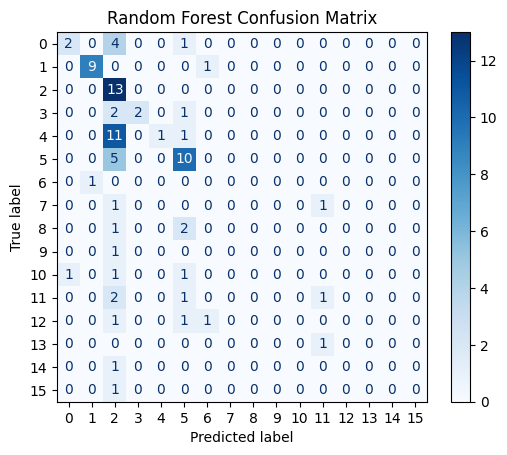

In [50]:
CRISPR_gene_dependency_master_df = CRISPR_gene_effect_master_df.dropna()
CRISPR_gene_dependency_master_df = CRISPR_gene_dependency_master_df[~CRISPR_gene_dependency_master_df['primary_disease'].isin(values_to_exclude)]

# Select features (numerical only) and target
X = CRISPR_gene_dependency_master_df.drop(['DepMap_ID', 'primary_disease'], axis=1).select_dtypes(include=np.number)
y = CRISPR_gene_dependency_master_df['primary_disease']

# Encode the target variable
y = pd.factorize(y)[0]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize the Random Forest Classifier
rf = RandomForestClassifier(max_depth= 10, min_samples_leaf= 1, min_samples_split= 10, n_estimators= 100)

# Train the Random Forest on the training set
rf.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = rf.predict(X_test)

# Evaluate the model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {accuracy_rf:.2f}")
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))

# Display the confusion matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf)
disp_rf.plot(cmap='Blues')
plt.title("Random Forest Confusion Matrix")
plt.show()

Random Forest Accuracy: 0.75
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.33      0.50        12
           1       1.00      0.81      0.90        16
           2       0.69      0.93      0.79        29
           3       0.80      0.40      0.53        10
           4       0.40      0.67      0.50         6
           5       0.72      1.00      0.84        13
           7       0.83      1.00      0.91        15
           9       1.00      1.00      1.00         3
          11       0.00      0.00      0.00         2
          12       0.75      1.00      0.86         3
          13       0.00      0.00      0.00         1
          16       0.00      0.00      0.00         1
          18       0.00      0.00      0.00         3

    accuracy                           0.75       114
   macro avg       0.55      0.55      0.53       114
weighted avg       0.75      0.75      0.72       114



/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  

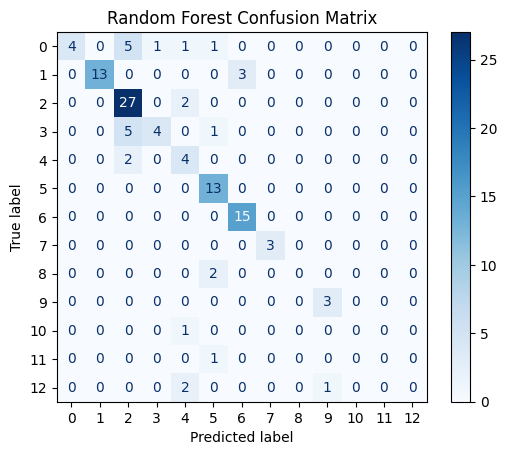

In [46]:
CCLE_expression_master_df = CCLE_expression_master_df.dropna()
CCLE_expression_master_df = CCLE_expression_master_df[~CCLE_expression_master_df['primary_disease'].isin(values_to_exclude)]

# Select features (numerical only) and target
X = CCLE_expression_master_df.drop(['DepMap_ID', 'primary_disease'], axis=1).select_dtypes(include=np.number)
y = CCLE_expression_master_df['primary_disease']

# Encode the target variable
y = pd.factorize(y)[0]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize the Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the Random Forest on the training set
rf.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = rf.predict(X_test)

# Evaluate the model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {accuracy_rf:.2f}")
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))

# Display the confusion matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf)
disp_rf.plot(cmap='Blues')
plt.title("Random Forest Confusion Matrix")
plt.show()

In [47]:
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_rf, cv=5, scoring='accuracy')
grid_search_rf.fit(X_train, y_train)

# Display best parameters and score
print(f"Best Parameters: {grid_search_rf.best_params_}")
print(f"Best Cross-Validation Accuracy: {grid_search_rf.best_score_:.2f}")

# Use the best model for predictions
best_rf = grid_search_rf.best_estimator_
y_pred_best_rf = best_rf.predict(X_test)

# Evaluate the optimized model
accuracy_best_rf = accuracy_score(y_test, y_pred_best_rf)
print(f"Optimized Random Forest Accuracy: {accuracy_best_rf:.2f}")
print("Optimized Random Forest Classification Report:")
print(classification_report(y_test, y_pred_best_rf))

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Best Parameters: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 300}
Best Cross-Validation Accuracy: 0.68
Optimized Random Forest Accuracy: 0.74
Optimized Random Forest Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.42      0.59        12
           1       0.93      0.81      0.87        16
           2       0.63      0.90      0.74        29
           3       1.00      0.40      0.57        10
           4       0.44      0.67      0.53         6
           5       0.72      1.00      0.84        13
           7       0.82      0.93      0.88        15
           9       1.00      0.67      0.80         3
          11       0.00      0.00      0.00         2
          12       0.75      1.00      0.86         3
          13       0.00      0.00      0.00         1
          16       0.00      0.00      0.00         1
          18       0.00      0.00      0.00         3

    accuracy    

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  

Random Forest Accuracy: 0.78
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.67      0.80        12
           1       0.93      0.81      0.87        16
           2       0.71      0.93      0.81        29
           3       1.00      0.40      0.57        10
           4       0.56      0.83      0.67         6
           5       0.72      1.00      0.84        13
           7       0.82      0.93      0.88        15
           9       1.00      0.67      0.80         3
          11       0.00      0.00      0.00         2
          12       0.75      1.00      0.86         3
          13       0.00      0.00      0.00         1
          16       0.00      0.00      0.00         1
          18       0.00      0.00      0.00         3

    accuracy                           0.78       114
   macro avg       0.58      0.56      0.54       114
weighted avg       0.77      0.78      0.75       114



/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  

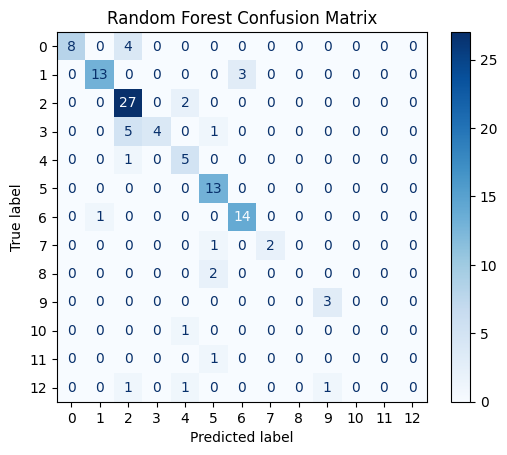

In [51]:
CCLE_expression_master_df = CCLE_expression_master_df.dropna()
CCLE_expression_master_df = CCLE_expression_master_df[~CCLE_expression_master_df['primary_disease'].isin(values_to_exclude)]

# Select features (numerical only) and target
X = CCLE_expression_master_df.drop(['DepMap_ID', 'primary_disease'], axis=1).select_dtypes(include=np.number)
y = CCLE_expression_master_df['primary_disease']

# Encode the target variable
y = pd.factorize(y)[0]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize the Random Forest Classifier
rf = RandomForestClassifier(max_depth= 10, min_samples_leaf= 2, min_samples_split= 5, n_estimators= 300)

# Train the Random Forest on the training set
rf.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = rf.predict(X_test)

# Evaluate the model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {accuracy_rf:.2f}")
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))

# Display the confusion matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf)
disp_rf.plot(cmap='Blues')
plt.title("Random Forest Confusion Matrix")
plt.show()